In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas import read_csv
from pandas import read_excel
from pandas import datetime
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf
from pandas import DataFrame
from pandas import Grouper

/var/folders/hl/cn9p9pcd0l35bxdphn5y3rgh0000gp/T/ipykernel_70677/3352135158.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


# Model Driven Methods

In [2]:
dfm = read_excel('/Users/vaishalimukherjee/Desktop/Project 1/Arima model/RWTCm.xls')
dfm.head()

,Date,COSP
0,1986-01-15,22.93
1,1986-02-15,15.46
2,1986-03-15,12.61
3,1986-04-15,12.84
4,1986-05-15,15.38


In [3]:
dfm.shape

(456, 2)

<AxesSubplot:>

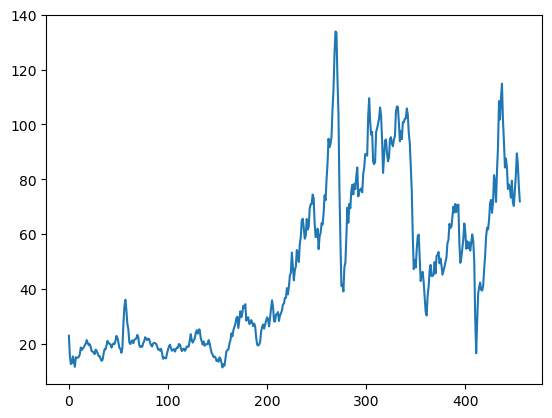

In [4]:
dfm.COSP.plot()

In [5]:
df = dfm.copy()
df.set_index('Date', inplace=True)
df.index.year

Int64Index([1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986, 1986,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='Date', length=456)

In [6]:
df.head()

,COSP
Date,
1986-01-15,22.93
1986-02-15,15.46
1986-03-15,12.61
1986-04-15,12.84
1986-05-15,15.38


In [7]:
ap = df.copy()
ap.reset_index(inplace=True)
ap['t'] = np.arange(1,len(ap)+1)
ap['t_squared'] = np.square(ap.t)
ap["month"] = ap.Date.dt.strftime("%b") # month extraction
ap["year"] = ap.Date.dt.strftime("%Y")  # year extraction
months = pd.get_dummies(ap['month'])
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
ap = pd.concat([ap,months],axis=1)
ap['log_COSP'] = np.log(ap['COSP'])
ap

,Date,COSP,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_COSP
0,1986-01-15,22.93,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,3.132446
1,1986-02-15,15.46,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,2.738256
2,1986-03-15,12.61,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,2.534490
3,1986-04-15,12.84,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,2.552565
4,1986-05-15,15.38,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,2.733068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,2023-08-15,81.39,452,204304,Aug,2023,0,0,0,0,0,0,0,1,0,0,0,0,4.399252
452,2023-09-15,89.43,453,205209,Sep,2023,0,0,0,0,0,0,0,0,1,0,0,0,4.493456
453,2023-10-15,85.64,454,206116,Oct,2023,0,0,0,0,0,0,0,0,0,1,0,0,4.450152
454,2023-11-15,77.69,455,207025,Nov,2023,0,0,0,0,0,0,0,0,0,0,1,0,4.352727


In [8]:
#Splitting data into Train and Test
size = 432
train_data = ap.iloc[:size]
test_data = ap.iloc[size:]

In [9]:
train_data.head()

,Date,COSP,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_COSP
0,1986-01-15,22.93,1,1,Jan,1986,1,0,0,0,0,0,0,0,0,0,0,0,3.132446
1,1986-02-15,15.46,2,4,Feb,1986,0,1,0,0,0,0,0,0,0,0,0,0,2.738256
2,1986-03-15,12.61,3,9,Mar,1986,0,0,1,0,0,0,0,0,0,0,0,0,2.534490
3,1986-04-15,12.84,4,16,Apr,1986,0,0,0,1,0,0,0,0,0,0,0,0,2.552565
4,1986-05-15,15.38,5,25,May,1986,0,0,0,0,1,0,0,0,0,0,0,0,2.733068


In [10]:
test_data.head()

,Date,COSP,t,t_squared,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_COSP
432,2022-01-15,83.22,433,187489,Jan,2022,1,0,0,0,0,0,0,0,0,0,0,0,4.421488
433,2022-02-15,91.64,434,188356,Feb,2022,0,1,0,0,0,0,0,0,0,0,0,0,4.517868
434,2022-03-15,108.50,435,189225,Mar,2022,0,0,1,0,0,0,0,0,0,0,0,0,4.686750
435,2022-04-15,101.78,436,190096,Apr,2022,0,0,0,1,0,0,0,0,0,0,0,0,4.622814
436,2022-05-15,109.55,437,190969,May,2022,0,0,0,0,1,0,0,0,0,0,0,0,4.696381


In [11]:
#Building Model
import statsmodels.formula.api as smf 

In [12]:
#1.Linear model
linear_model = smf.ols('COSP~t',data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['COSP'])-np.array(pred_linear))**2))
rmse_linear

14.116136672758046

In [13]:
#2. Exponential Model
exp = smf.ols('log_COSP~t',data=train_data).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test_data['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test_data['COSP'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

16.07430407211074

In [14]:
#3. Quadratic Model
quad = smf.ols('COSP~t+t_squared',data=train_data).fit()
pred_quad = pd.Series(quad.predict(test_data[["t","t_squared"]]))
rmse_quad = np.sqrt(np.mean((np.array(test_data['COSP'])-np.array(pred_quad))**2))
rmse_quad

20.707723738624594

In [15]:
#4. Additive seasonality
add_sea = smf.ols('COSP~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea = pd.Series(add_sea.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(test_data['COSP'])-np.array(pred_add_sea))**2))
rmse_add_sea

43.303264746057856

In [16]:
#5. Additive Seasonality Quadratic
add_sea_quad = smf.ols('COSP~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train_data).fit()
pred_add_sea_quad = pd.Series(add_sea_quad.predict(test_data[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(test_data['COSP'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

20.50825452239871

In [17]:
#6. Multiplicative Seasonality
mul_sea = smf.ols('log_COSP~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train_data).fit()
pred_mult_sea = pd.Series(mul_sea.predict(test_data))
rmse_mult_sea = np.sqrt(np.mean((np.array(test_data['COSP'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

51.36531518278043

In [18]:
#7. Multiplicative Additive Seasonality
mul_add_sea = smf.ols('log_COSP~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = train_data).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(test_data))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(test_data['COSP'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea

15.906114316846109

In [19]:
#Compare the results
data = {"Models":pd.Series(["RMSE_Linear","RMSE_Exp","RMSE_Quad","RMSE_Add_Sea","RMSE_Add_Sea_Quad","RMSE_Mult_Sea","RMSE_Mult_Add_Sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_sea,rmse_add_sea_quad,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'], inplace=True, ignore_index=True)


In [21]:
table_rmse

,Models,RMSE_Values
0,RMSE_Linear,14.116137
1,RMSE_Mult_Add_Sea,15.906114
2,RMSE_Exp,16.074304
3,RMSE_Add_Sea_Quad,20.508255
4,RMSE_Quad,20.707724
5,RMSE_Add_Sea,43.303265
6,RMSE_Mult_Sea,51.365315
